In [42]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt

random_state = 2
data_kdd99 = datasets.fetch_kddcup99(subset=None, percent10=True,random_state = random_state)
Y = pd.DataFrame(data_kdd99.target)
print(Y[0].unique())
print(Y.describe())
print(Y[0].astype('category'))
print(Y[0].shape)

X=pd.DataFrame(data_kdd99.data)
data_cmb = X
data_cmb['target'] = Y[0]

[b'normal.' b'buffer_overflow.' b'loadmodule.' b'perl.' b'neptune.'
 b'smurf.' b'guess_passwd.' b'pod.' b'teardrop.' b'portsweep.' b'ipsweep.'
 b'land.' b'ftp_write.' b'back.' b'imap.' b'satan.' b'phf.' b'nmap.'
 b'multihop.' b'warezmaster.' b'warezclient.' b'spy.' b'rootkit.']
                0
count      494021
unique         23
top     b'smurf.'
freq       280790
0         b'normal.'
1         b'normal.'
2         b'normal.'
3         b'normal.'
4         b'normal.'
5         b'normal.'
6         b'normal.'
7         b'normal.'
8         b'normal.'
9         b'normal.'
10        b'normal.'
11        b'normal.'
12        b'normal.'
13        b'normal.'
14        b'normal.'
15        b'normal.'
16        b'normal.'
17        b'normal.'
18        b'normal.'
19        b'normal.'
20        b'normal.'
21        b'normal.'
22        b'normal.'
23        b'normal.'
24        b'normal.'
25        b'normal.'
26        b'normal.'
27        b'normal.'
28        b'normal.'
29        b'normal.'
3

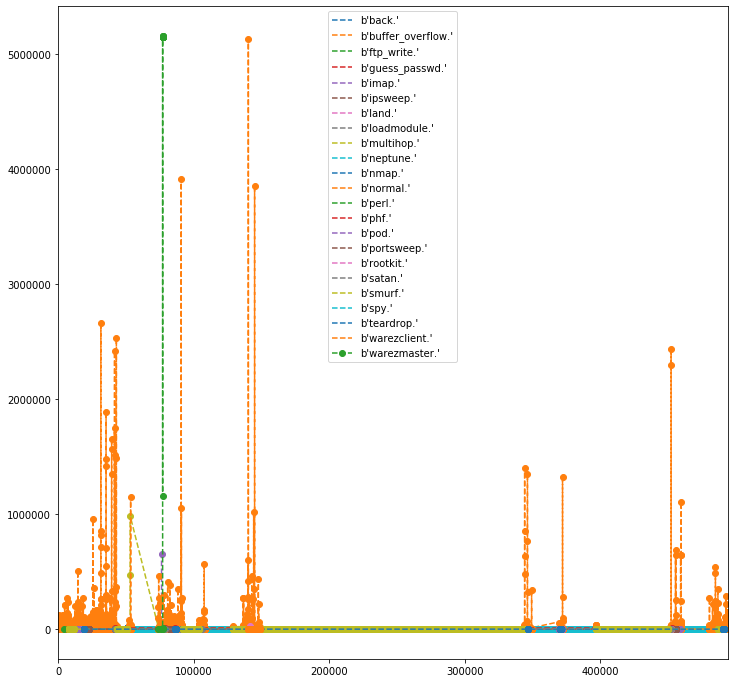

In [8]:

col_names = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment",
             "urgent","hot","num_failed_logins","logged_in","num_compromised",
             "root_shell","su_attempted","num_root","num_file_creations",
             "num_shells","num_access_files","num_outbound_cmds",
             "is_hot_login","is_guest_login","count","srv_count","serror_rate",
             "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
             "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
             "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
             "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
             "dst_host_rerror_rate","dst_host_srv_rerror_rate","target"]

data_cmb.columns = col_names
dsummary=data_cmb.groupby("target").describe()
pd.set_option('display.max_rows', 500)

width = 12
height = 12
plt.figure(figsize=(width, height))
data_cmb.groupby("target")["dst_bytes"].plot(style='--o', legend=True)
plt.show()

In [44]:
from sklearn import datasets
import time
from sklearn import svm
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
rseed = 93
random_state = 2
data_kdd99 = datasets.fetch_kddcup99(subset = None, percent10 = True, random_state = random_state)

X = pd.DataFrame(data_kdd99.data)
Y = pd.DataFrame(data_kdd99.target)

col_names = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment",
             "urgent","hot","num_failed_logins","logged_in","num_compromised",
             "root_shell","su_attempted","num_root","num_file_creations",
             "num_shells","num_access_files","num_outbound_cmds",
             "is_hot_login","is_guest_login","count","srv_count","serror_rate",
             "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
             "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
             "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
             "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
             "dst_host_rerror_rate","dst_host_srv_rerror_rate","target"]

print(X.shape)
print(Y.shape)
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2, random_state = rseed)

X_train_trans = X_train.drop(X_train.columns[[1,2,3]],axis = 1)
scaling = MinMaxScaler(feature_range = (-1,1)).fit(X_train_trans)
X_train_trans = scaling.transform(X_train_trans)

X_test_trans = X_test.drop(X_test.columns[[1,2,3]],axis = 1)
X_test_trans = scaling.transform(X_test_trans)

train_label = y_train[0].tolist()
test_label = y_test[0].tolist()
print(train_label[0])

time_start = time.time()

model1 = svm.SVC(kernel='linear', C=1, verbose=True, random_state = rseed, decision_function_shape="ovo").fit(X_train_trans, train_label)
print("model completed, using time %5.2f seconds" % (time.time() - time_start))

print("model info :\n%s : " % model1)
print("number of labels: %d" % (model1.classes_.shape[0]))
#print("cache size: %d" % model2.cache_size)
print("expected number of classes under one-vs-one model : %d" % (model1.classes_.shape[0]*(model2.classes_.shape[0]-1)/2))
print("accuracy based on training : %5.4f" % model1.score(X_train_trans, train_label))
print("accuracy based on testing: %5.4f" % model1.score(X_test_trans, test_label))

(494021, 41)
(494021, 1)
b'smurf.'
[LibSVM]model completed, using time 42.55 seconds
model info :
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=93,
    shrinking=True, tol=0.001, verbose=True) : 
number of labels: 23
expected number of classes under one-vs-one model : 253
accuracy based on training : 0.9988
accuracy based on testing: 0.9987


In [39]:
import numpy as np

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    np.set_printoptions(precision=2)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
    else:
        print("")
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j], fmt),
                horizontalalignment="center",
                color = "white" if cm[i,j] > thresh else "black")

C:\Users\kwakms123\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


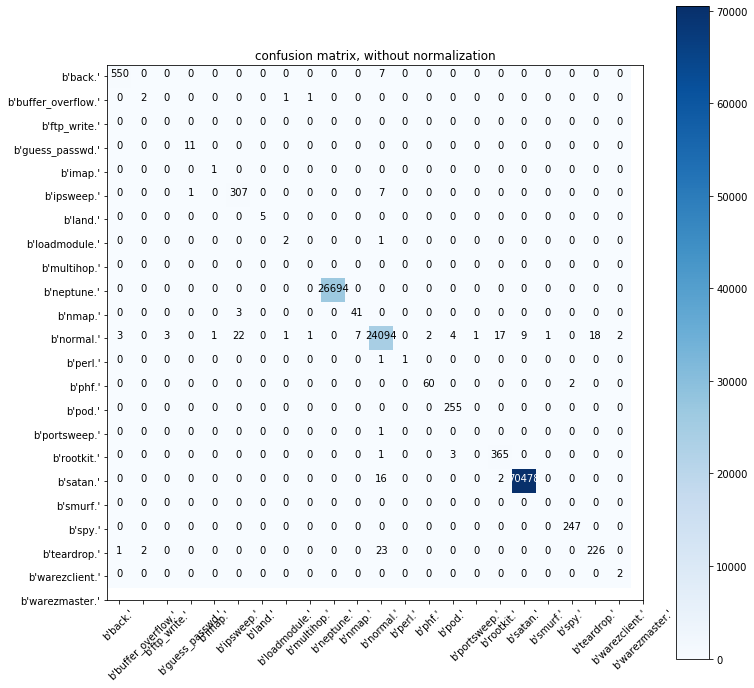

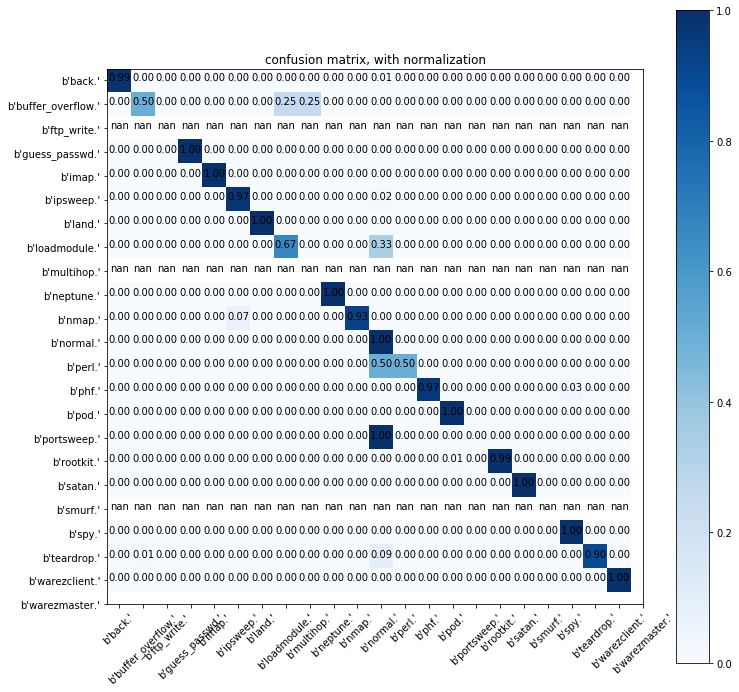

In [40]:

np.set_printoptions(precision = 2)

width = 12
height= 12
plt.figure(figsize=(width, height))
plot_confusion_matrix(cnf_model1, classes=model1.classes_, title="confusion matrix, without normalization")

plt.figure(figsize=(width, height))
plot_confusion_matrix(cnf_model1, classes = model1.classes_, normalize=True, title="confusion matrix, with normalization")
plt.show()

model completed, using time 2057.98 seconds
model info :
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best') : 
number of labels: 23
expected number of classes under one-vs-one model : 253
accuracy based on training : 1.0000
accuracy based on testing: 0.9994



C:\Users\kwakms123\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


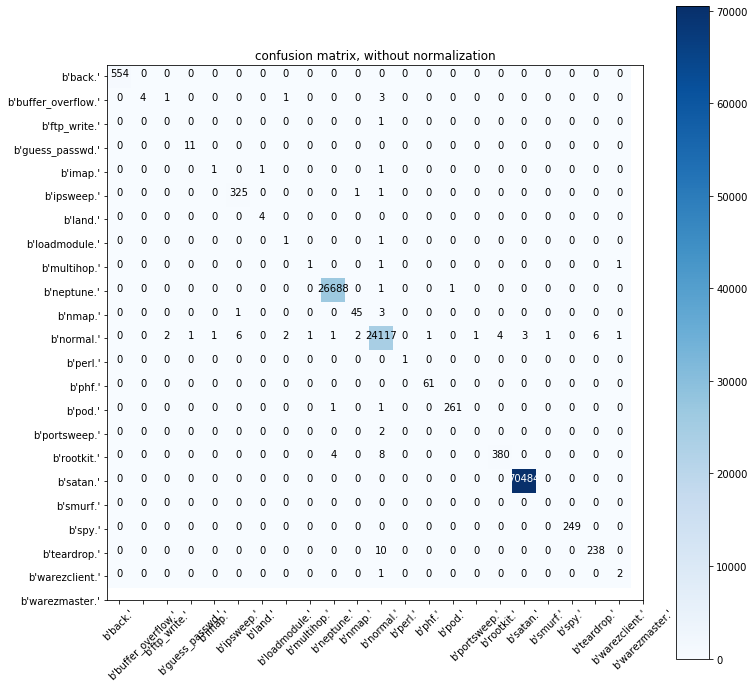

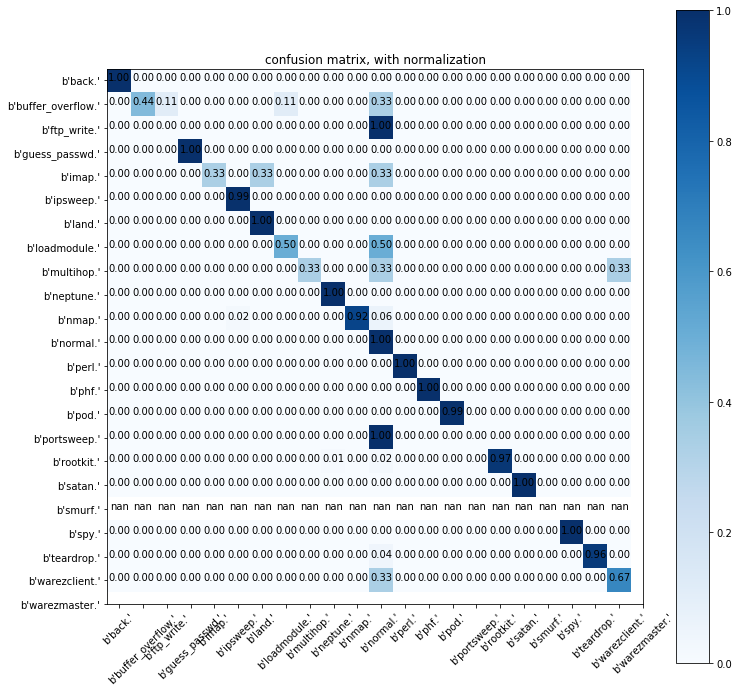

In [41]:
from sklearn import tree

model2= tree.DecisionTreeClassifier().fit(X_train_trans, train_label)
print("model completed, using time %5.2f seconds" % (time.time() - time_start))

print("model info :\n%s : " % model2)
print("number of labels: %d" % (model2.classes_.shape[0]))
#print("cache size: %d" % model2.cache_size)
print("expected number of classes under one-vs-one model : %d" % (model2.classes_.shape[0]*(model2.classes_.shape[0]-1)/2))
print("accuracy based on training : %5.4f" % model2.score(X_train_trans, train_label))
print("accuracy based on testing: %5.4f" % model2.score(X_test_trans, test_label))

cnf_model2 = confusion_matrix(model2.predict(X_test_trans), test_label)

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    np.set_printoptions(precision=2)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
    else:
        print("")
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j], fmt),
                horizontalalignment="center",
                color = "white" if cm[i,j] > thresh else "black")

np.set_printoptions(precision = 2)

width = 12
height= 12
plt.figure(figsize=(width, height))
plot_confusion_matrix(cnf_model2, classes=model2.classes_, title="confusion matrix, without normalization")

plt.figure(figsize=(width, height))
plot_confusion_matrix(cnf_model2, classes = model2.classes_, normalize=True, title="confusion matrix, with normalization")
plt.show()

C:\Users\kwakms123\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


model completed, using time 2624.83 seconds
model info :
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) : 
number of labels: 23
expected number of classes under one-vs-one model : 253
accuracy based on training : 1.0000
accuracy based on testing: 0.9996



C:\Users\kwakms123\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


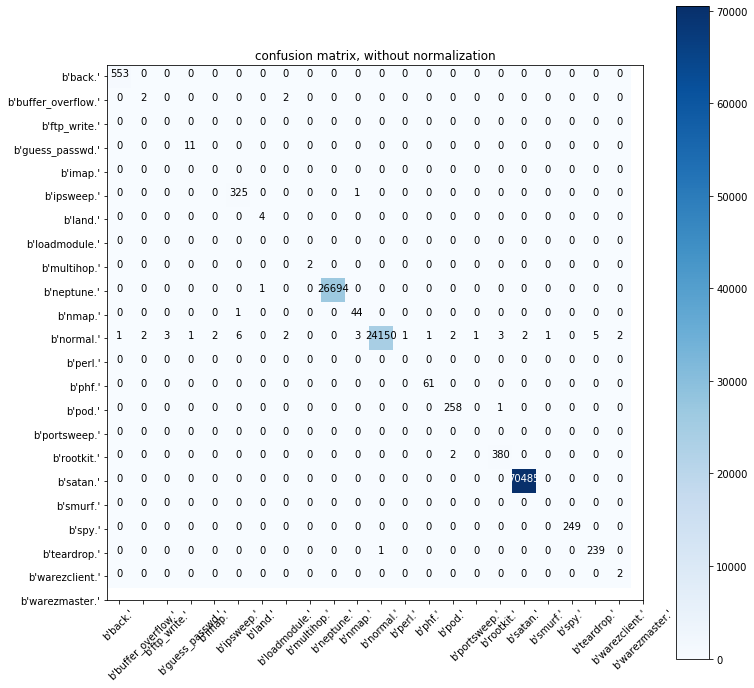

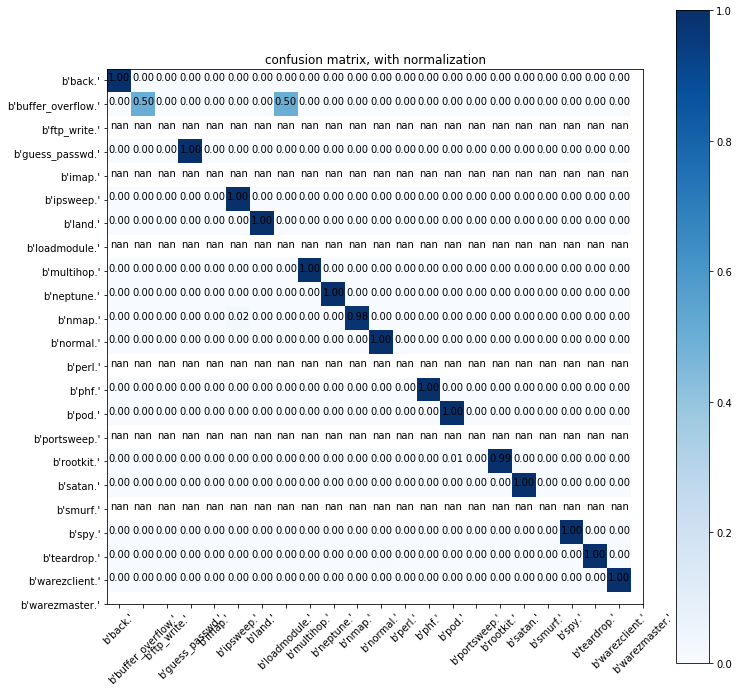

In [35]:
from sklearn import ensemble


#model1 = svm.SVC(kernel='linear', C=1, verbose=True, random_state = rseed, decision_function_shape="ovo").fit(X_train_trans, train_label)
model3= ensemble.RandomForestClassifier().fit(X_train_trans, train_label)
print("model completed, using time %5.2f seconds" % (time.time() - time_start))

print("model info :\n%s : " % model3)
print("number of labels: %d" % (model3.classes_.shape[0]))
#print("cache size: %d" % model3.cache_size)
print("expected number of classes under one-vs-one model : %d" % (model3.classes_.shape[0]*(model2.classes_.shape[0]-1)/2))
print("accuracy based on training : %5.4f" % model3.score(X_train_trans, train_label))
print("accuracy based on testing: %5.4f" % model3.score(X_test_trans, test_label))

cnf_model3 = confusion_matrix(model3.predict(X_test_trans), test_label)

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    np.set_printoptions(precision=2)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
    else:
        print("")
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j], fmt),
                horizontalalignment="center",
                color = "white" if cm[i,j] > thresh else "black")

np.set_printoptions(precision = 2)

width = 12
height= 12
plt.figure(figsize=(width, height))
plot_confusion_matrix(cnf_model3, classes=model2.classes_, title="confusion matrix, without normalization")

plt.figure(figsize=(width, height))
plot_confusion_matrix(cnf_model3, classes = model2.classes_, normalize=True, title="confusion matrix, with normalization")
plt.show()